In [3]:
from IPython.display import display
from IPython.display import clear_output

import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')


In [4]:
!pip install praw
import praw
reddit= praw.Reddit(client_id='wm0tUOahG4xwtQ', client_secret='YEww466YN6EGAuixnQXPd0yHbzk', user_agent='mythili_rajendra')



You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
headlines= set()

In [7]:
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    
    print(len(headlines))
   


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia= SIA()
results=[]
for line in headlines:
    pol_score=sia.polarity_scores(line)
    pol_score['headline']= line
    results.append(pol_score)


C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [9]:
pprint(results[:4], width=100)

[{'compound': -0.296,
  'headline': 'No More Secrets: Congress Bans Pharmacist ‘Gag Orders’ On Drug Prices',
  'neg': 0.18,
  'neu': 0.82,
  'pos': 0.0},
 {'compound': -0.1027,
  'headline': 'DHS chief: Security sensors will monitor cyber threats for midterms',
  'neg': 0.212,
  'neu': 0.606,
  'pos': 0.182},
 {'compound': 0.0,
  'headline': 'US moves to limit nuclear sales to China',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': "'We have to release the love': Kanye meets with Trump, Twitter implodes",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [12]:
df= pd.DataFrame.from_records(results)
df.head(6)


,compound,headline,neg,neu,pos
0,-0.2960,No More Secrets: Congress Bans Pharmacist ‘Gag...,0.180,0.820,0.000
1,-0.1027,DHS chief: Security sensors will monitor cyber...,0.212,0.606,0.182
2,0.0000,US moves to limit nuclear sales to China,0.000,1.000,0.000
3,0.0000,'We have to release the love': Kanye meets wit...,0.000,1.000,0.000
4,0.0000,"I am Paulette Jordan, Democratic candidate for...",0.000,1.000,0.000
5,0.0000,"Trump to Finally Answer Mueller’s Questions, B...",0.000,1.000,0.000


In [18]:
df['label']=0
df.loc[df['compound']>0.2,'label']=1
df.loc[df['compound']<-0.2,'label']=-1


In [16]:
df.head(6)

,compound,headline,neg,neu,pos,label
0,-0.2960,No More Secrets: Congress Bans Pharmacist ‘Gag...,0.180,0.820,0.000,-1
1,-0.1027,DHS chief: Security sensors will monitor cyber...,0.212,0.606,0.182,0
2,0.0000,US moves to limit nuclear sales to China,0.000,1.000,0.000,0
3,0.0000,'We have to release the love': Kanye meets wit...,0.000,1.000,0.000,0
4,0.0000,"I am Paulette Jordan, Democratic candidate for...",0.000,1.000,0.000,0
5,0.0000,"Trump to Finally Answer Mueller’s Questions, B...",0.000,1.000,0.000,0


In [20]:
df2=df[['headline','label']]
df2.to_csv('reddit_headline_sentiment_analysis.csv',mode='a',encoding='utf-8',index=False)    //mode='a' saya append

In [23]:
print('positive headlines:\n')
pprint(list(df[df['label'] == 1].headline)[:7], width=200)

print('negative headlines:\n')
pprint(list(df[df['label'] == 1].headline)[:7], width=400)

positive headlines:

['Joe Manchin, the Good Ol’ Corporate Boy From West Virginia',
 'Women across the world send postcards to Christine Blasey Ford to show support',
 'Justice Kavanaugh Is Already Going to Bat for the Trump Agenda',
 'Out-of-state contributions pouring into approval voting campaign...',
 'Congress Needs Radicals Like Alexandria Ocasio-Cortez',
 'Dave Chappelle: Kanye ‘Shouldn’t Say All That Sh*t’ in Support of Trump',
 "'Devin Nunes should get the Medal of Honor' for handling of Russia probe, President Trump says"]
negative headlines:

['Joe Manchin, the Good Ol’ Corporate Boy From West Virginia',
 'Women across the world send postcards to Christine Blasey Ford to show support',
 'Justice Kavanaugh Is Already Going to Bat for the Trump Agenda',
 'Out-of-state contributions pouring into approval voting campaign...',
 'Congress Needs Radicals Like Alexandria Ocasio-Cortez',
 'Dave Chappelle: Kanye ‘Shouldn’t Say All That Sh*t’ in Support of Trump',
 "'Devin Nunes should

In [26]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True)*100)   //normalize returns relative frequency

 0    378
-1    371
 1    169
Name: label, dtype: int64
 0    41.176471
-1    40.413943
 1    18.409586
Name: label, dtype: float64


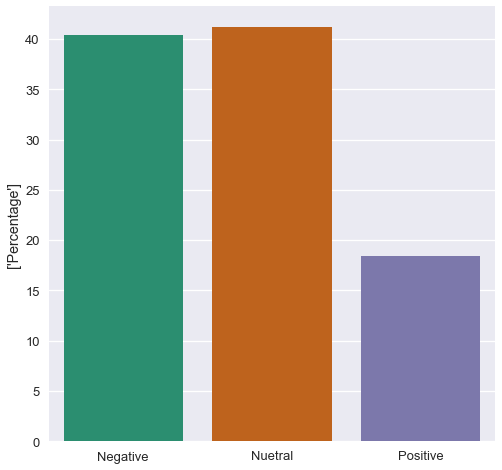

In [31]:
fig, ax= plt.subplots(figsize=(8,8))
counts= df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['Negative','Nuetral','Positive'])
ax.set_ylabel(['Percentage'])
plt.show()
